In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
url = 'https://raw.githubusercontent.com/ghego/zero_to_deep_learning_video/master/data/diabetes.csv'

df = pd.read_csv(url)


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
len(df)

768

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CBECA7400>,
      dtype=object)

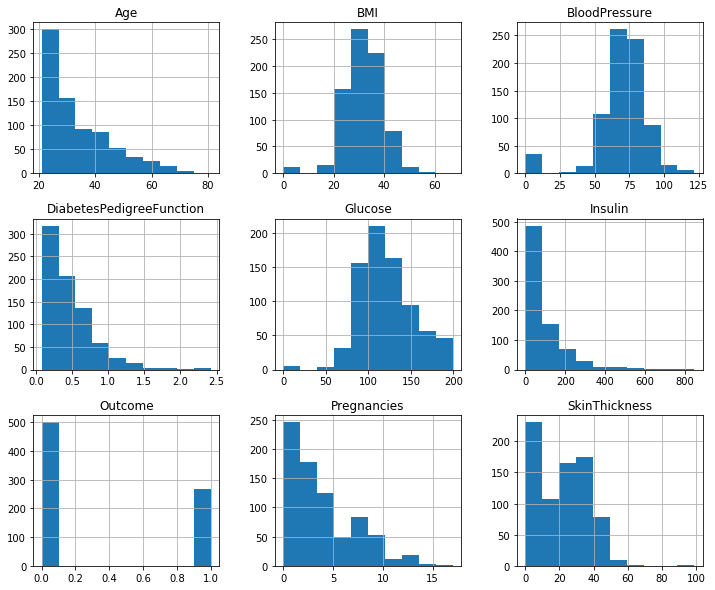

In [0]:
df.hist(figsize=(12, 10))

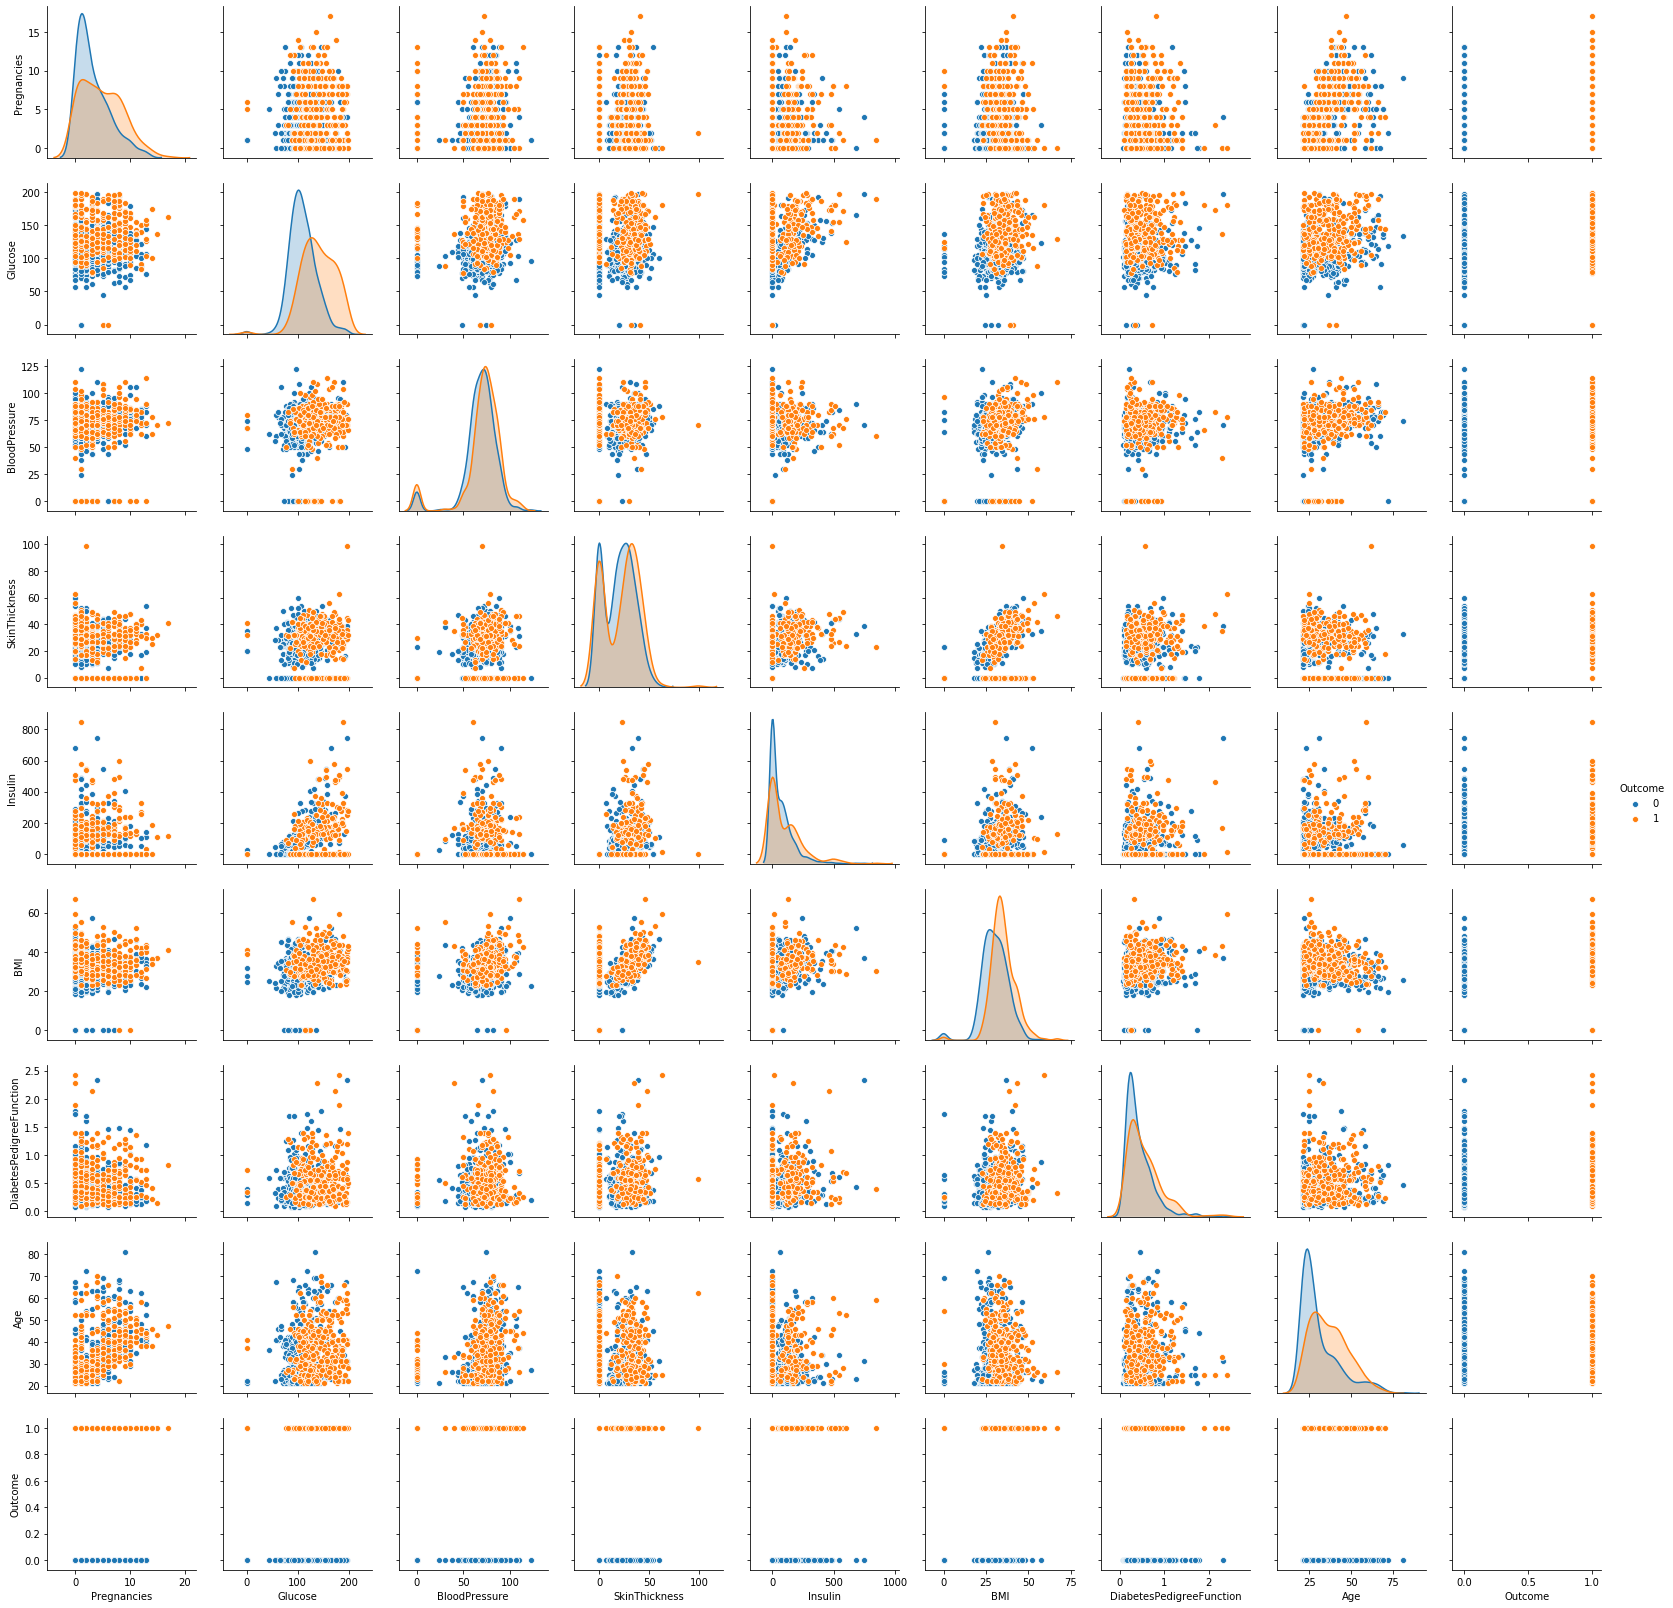

In [0]:
sns.pairplot(df, hue='Outcome')

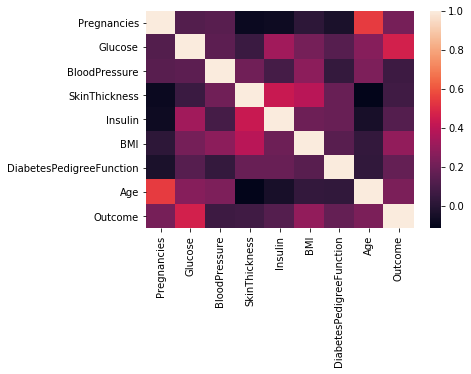

In [0]:
sns.heatmap(df.corr())

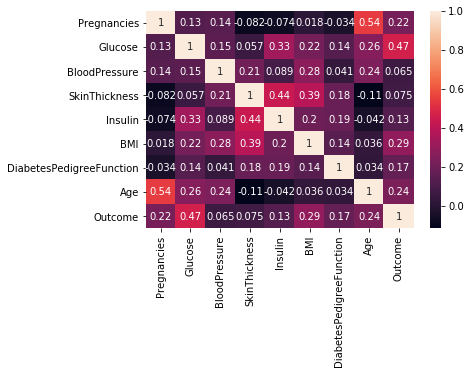

In [0]:
sns.heatmap(df.corr(), annot = True)

In [6]:

from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

sc = StandardScaler()
X = sc.fit_transform(df.drop(['Outcome'], axis=1))
y = df['Outcome'].values
y_cat = to_categorical(y)

Using TensorFlow backend.


In [7]:
X.shape

(768, 8)

In [8]:
y.shape

(768,)

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat,
                                                    random_state=22,
                                                    test_size=0.3)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers

In [63]:
model = Sequential()
model.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(Adam(lr=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'categorical_crossentropy'])
keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
result = model.evaluate(X_test, y_test)
model.summary()

231/231 [==============================] - 0s 1ms/step
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 66        
Total params: 1,410
Trainable params: 1,410
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 1,410
Trainable params: 1,410
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.fit(X_train,
                                    X_test,
                                    epochs=20,
                                    batch_size=12,
                                    validation_data=(y_train, y_test),
                                    verbose=2)

ValueError: ignored

In [64]:
history = model.fit(X_train, y_train, epochs=200, verbose=1, validation_split=0.25)

Train on 402 samples, validate on 135 samples
Epoch 1/200
402/402 [==============================] - 0s 934us/step - loss: 0.5579 - acc: 0.7090 - categorical_crossentropy: 0.5579 - val_loss: 0.5388 - val_acc: 0.7704 - val_categorical_crossentropy: 0.5388
Epoch 2/200
402/402 [==============================] - 0s 64us/step - loss: 0.4803 - acc: 0.7687 - categorical_crossentropy: 0.4803 - val_loss: 0.6074 - val_acc: 0.8000 - val_categorical_crossentropy: 0.6074
Epoch 3/200
402/402 [==============================] - 0s 64us/step - loss: 0.4427 - acc: 0.7836 - categorical_crossentropy: 0.4427 - val_loss: 0.5941 - val_acc: 0.7852 - val_categorical_crossentropy: 0.5941
Epoch 4/200
402/402 [==============================] - 0s 64us/step - loss: 0.4303 - acc: 0.7836 - categorical_crossentropy: 0.4303 - val_loss: 0.6029 - val_acc: 0.7704 - val_categorical_crossentropy: 0.6029
Epoch 5/200
402/402 [==============================] - 0s 61us/step - loss: 0.4200 - acc: 0.8035 - categorical_crossentro

In [68]:
model.evaluate(X_test, y_test)

231/231 [==============================] - 0s 62us/step


[2.075205658421372, 0.7316017321177891, 2.075205658421372]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


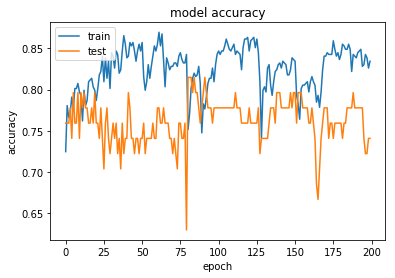

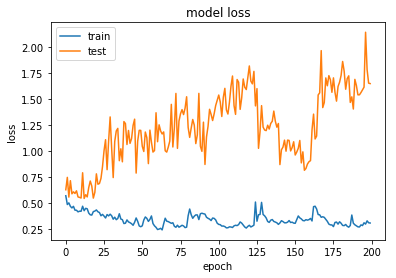

In [17]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [61]:
smaller_model = Sequential()
smaller_model.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))
smaller_model.add(Dense(2, activation='softmax'))
smaller_model.compile(Adam(lr=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'categorical_crossentropy'])
keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
result = smaller_model.evaluate(X_test, y_test)
smaller_model.summary()

231/231 [==============================] - 0s 886us/step
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 66        
Total params: 354
Trainable params: 354
Non-trainable params: 0
_________________________________________________________________


In [62]:
smaller_history = smaller_model.fit(X_train, y_train, epochs=200, verbose=1, validation_split=0.25)

Train on 402 samples, validate on 135 samples
Epoch 1/200
402/402 [==============================] - 0s 757us/step - loss: 0.5486 - acc: 0.7289 - categorical_crossentropy: 0.5486 - val_loss: 0.6188 - val_acc: 0.7333 - val_categorical_crossentropy: 0.6188
Epoch 2/200
402/402 [==============================] - 0s 61us/step - loss: 0.4800 - acc: 0.7761 - categorical_crossentropy: 0.4800 - val_loss: 0.6195 - val_acc: 0.7037 - val_categorical_crossentropy: 0.6195
Epoch 3/200
402/402 [==============================] - 0s 60us/step - loss: 0.4768 - acc: 0.7587 - categorical_crossentropy: 0.4768 - val_loss: 0.6006 - val_acc: 0.7778 - val_categorical_crossentropy: 0.6006
Epoch 4/200
402/402 [==============================] - 0s 57us/step - loss: 0.4539 - acc: 0.7910 - categorical_crossentropy: 0.4539 - val_loss: 0.5715 - val_acc: 0.7704 - val_categorical_crossentropy: 0.5715
Epoch 5/200
402/402 [==============================] - 0s 59us/step - loss: 0.4383 - acc: 0.7960 - categorical_crossentro

In [67]:
smaller_model.evaluate(X_test, y_test)

231/231 [==============================] - 0s 41us/step


[2.2788967260550628, 0.6969696974857545, 2.2788967260550628]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


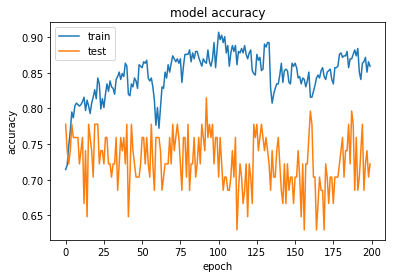

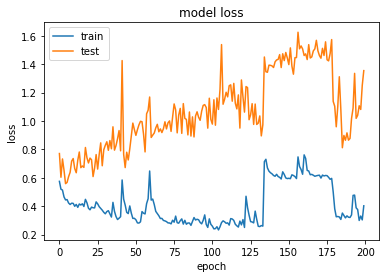

In [20]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(smaller_history.history['acc'])
plt.plot(smaller_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(smaller_history.history['loss'])
plt.plot(smaller_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
def plot_history(histories, key='categorical_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

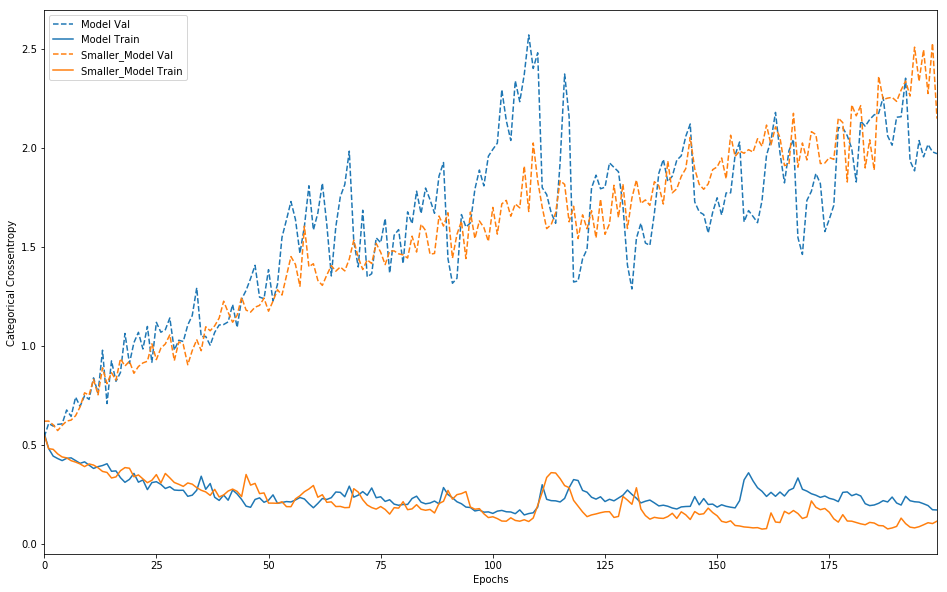

In [66]:
plot_history([('model', history),
              ('smaller_model', smaller_history)])

In [71]:
print('model evaluate:', model.evaluate(X_test, y_test), '\n', 'smaller_model evaluate:', smaller_model.evaluate(X_test, y_test))

231/231 [==============================] - 0s 52us/step
model evaluate: [2.075205658421372, 0.7316017321177891, 2.075205658421372] 
 smaller_model evaluate: [2.2788967260550628, 0.6969696974857545, 2.2788967260550628]


In [0]:
################ first model seems to be better ##########################

In [85]:
model.evaluate(X_test, y_test)

231/231 [==============================] - 0s 75us/step


[2.075205658421372, 0.7316017321177891, 2.075205658421372]

In [73]:
weights, biases = model.layers[0].get_weights()
print('weights:',weights, '\n', '\n', 'biases:', biases)

weights: [[ 1.4978557e+00 -4.3276614e-01 -1.5545968e+00 -1.3620362e+00
   2.2424688e+00  2.2073908e+00 -1.9008902e+00 -3.8385287e-01
   2.0261288e+00  1.6727062e-02  2.1152453e+00 -2.4842551e-01
   5.7765377e-01  1.1834121e+00 -3.8327563e+00 -5.9478176e-01
   6.2454385e-01 -6.0759890e-01  2.6517766e+00 -3.5152810e+00
   2.1087554e+00 -1.4216280e+00  1.2865406e+00  6.7087066e-01
   2.1580994e-01  6.0693699e-01  9.4390690e-01 -6.0302001e-01
   1.2668132e+00  3.2678500e-01 -1.2003869e+00 -7.3956776e-01]
 [ 3.0177934e+00 -2.8760071e+00  9.9369699e-01  2.1950765e-01
  -1.4482933e-01  2.0469801e+00 -4.2475095e+00 -5.9049284e-01
  -2.6548536e+00  2.5176067e+00 -2.6354492e+00 -1.0959223e-01
   1.6260117e+00  1.8144248e+00 -1.2725959e+00  3.0120656e-01
  -2.1248696e+00 -3.5121715e+00  6.6169608e-01 -2.7704152e-01
  -1.7111672e+00 -1.7400961e-01 -5.1626712e-01  2.7076097e+00
  -1.0972346e+00 -3.3914969e+00  2.0645208e+00 -9.9365896e-01
   3.3050117e+00  4.6790085e+00 -9.9457204e-01  2.0363541e+0

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [84]:
pd.Series(y_test_class).value_counts() / len(y_test_class)

accuracy_score(y_test_class, y_pred_class)

0.7316017316017316

In [78]:
print(confusion_matrix(y_test_class, y_pred_class))
print('\n')
print(classification_report(y_test_class, y_pred_class))

[[111  39]
 [ 23  58]]


              precision    recall  f1-score   support

           0       0.83      0.74      0.78       150
           1       0.60      0.72      0.65        81

    accuracy                           0.73       231
   macro avg       0.71      0.73      0.72       231
weighted avg       0.75      0.73      0.74       231



In [0]:
############### deploying model #################

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
def prediction(a, b, c, d, e, f, g, h):
    a = (a - np.mean(df['Pregnancies'])/np.std(df['Pregnancies']))
    b = (b - np.mean(df['Glucose'])/np.std(df['Glucose']))
    c = (c - np.mean(df['BloodPressure'])/np.std(df['BloodPressure']))
    d = (d - np.mean(df['SkinThickness'])/np.std(df['SkinThickness']))
    e = (e - np.mean(df['Insulin'])/np.std(df['Insulin']))
    f = (f - np.mean(df['BMI'])/np.std(df['BMI']))
    g = (g - np.mean(df['DiabetesPedigreeFunction'])/np.std(df['DiabetesPedigreeFunction']))
    h = (h - np.mean(df['Age'])/np.std(df['Age']))
    
    
    y_new = (a, b, c, d, e, f, g, h)
    print(model.predict_classes([[y_new]]))

In [80]:
prediction(6, 148, 72, 35, 0, 33.6, 0.627, 50)

[1]
